In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navjotkaushal/mobile-price-classification-dataset") + '/Mobile.csv'

print("Path to dataset files:", path)


Path to dataset files: /home/vavilon/.cache/kagglehub/datasets/navjotkaushal/mobile-price-classification-dataset/versions/1/Mobile.csv


In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv(path)
df.head()

,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842 mAh,No,2.2,No,1 pixels,No,7 gb,0.6 cm,188 g,2,...,20 ppcm,756 ppcm,2549 mb,9 cm,7 cm,19,No,No,Yes,Medium cost
1,1021 mAh,Yes,0.5,Yes,0 pixels,Yes,53 gb,0.7 cm,136 g,3,...,905 ppcm,1988 ppcm,2631 mb,17 cm,3 cm,7,Yes,Yes,No,High cost
2,563 mAh,Yes,0.5,Yes,2 pixels,Yes,41 gb,0.9 cm,145 g,5,...,1263 ppcm,1716 ppcm,2603 mb,11 cm,2 cm,9,Yes,Yes,No,High cost
3,615 mAh,Yes,2.5,No,0 pixels,No,10 gb,0.8 cm,131 g,6,...,1216 ppcm,1786 ppcm,2769 mb,16 cm,8 cm,11,Yes,No,No,High cost
4,1821 mAh,Yes,1.2,No,13 pixels,Yes,44 gb,0.6 cm,141 g,2,...,1208 ppcm,1212 ppcm,1411 mb,8 cm,2 cm,15,Yes,Yes,No,Medium cost


In [31]:
keep_only_digits = [
    'Battery_power_mAh',
    'Front_camera',
    'Internal_memeory_gb',
    'Mobile_depth',
    'Mobile_weight',
    'Primary_camera',
    'px_height',
    'Pixel_width',
    'Ram_mb',
    'Screen_height',
    'Screen_weight',
    ]

In [32]:
df.shape

(2000, 21)

In [33]:
keep_only_digits: list[str]
keep_digit = lambda col: col.str.split(' ').str[0]
df[keep_only_digits] = df[keep_only_digits].astype(str).apply(keep_digit).astype(float)
df.head(3)

,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842.0,No,2.2,No,1.0,No,7.0,0.6,188.0,2,...,20.0,756.0,2549.0,9.0,7.0,19,No,No,Yes,Medium cost
1,1021.0,Yes,0.5,Yes,0.0,Yes,53.0,0.7,136.0,3,...,905.0,1988.0,2631.0,17.0,3.0,7,Yes,Yes,No,High cost
2,563.0,Yes,0.5,Yes,2.0,Yes,41.0,0.9,145.0,5,...,1263.0,1716.0,2603.0,11.0,2.0,9,Yes,Yes,No,High cost


Text(0.5, 0, 'Column')

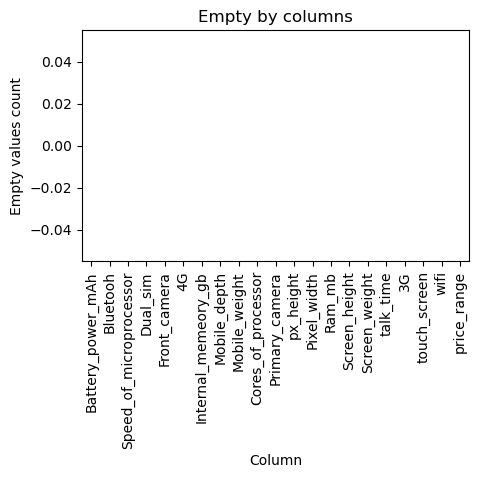

In [34]:
ax = df.isnull().sum().plot.bar(figsize=(5, 3))
ax.set_title('Empty by columns')
ax.set_ylabel('Empty values count')
ax.set_xlabel('Column')

Text(0.5, 0, 'Target')

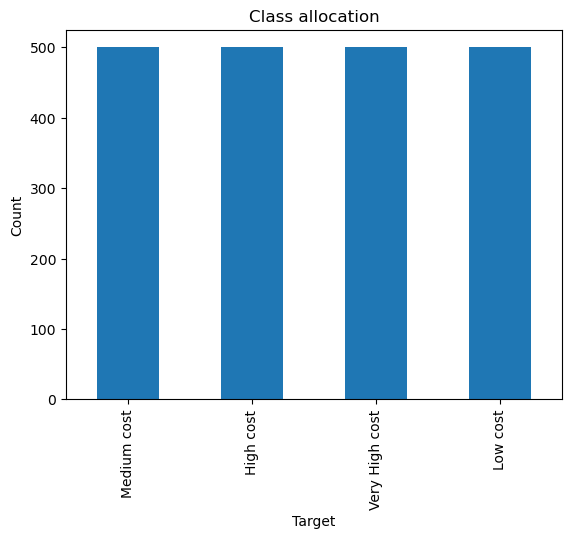

In [35]:
ax = df.price_range.value_counts().plot.bar()
ax.set_title('Class allocation')
ax.set_ylabel('Count')
ax.set_xlabel('Target')

array([[<Axes: title={'center': 'Battery_power_mAh'}>,
        <Axes: title={'center': 'Speed_of_microprocessor'}>,
        <Axes: title={'center': 'Front_camera'}>,
        <Axes: title={'center': 'Internal_memeory_gb'}>,
        <Axes: title={'center': 'Mobile_depth'}>,
        <Axes: title={'center': 'Mobile_weight'}>,
        <Axes: title={'center': 'Cores_of_processor'}>],
       [<Axes: title={'center': 'Primary_camera'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'Pixel_width'}>,
        <Axes: title={'center': 'Ram_mb'}>,
        <Axes: title={'center': 'Screen_height'}>,
        <Axes: title={'center': 'Screen_weight'}>,
        <Axes: title={'center': 'talk_time'}>]], dtype=object)

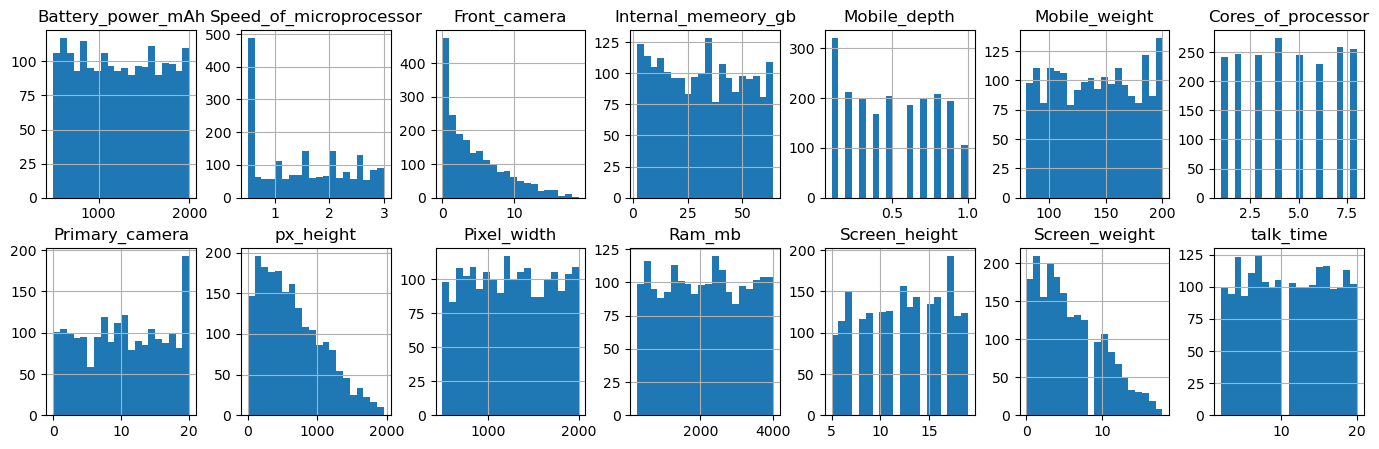

In [36]:
df.hist(layout=(2, 7), figsize=(17, 5), bins=20)

Battery_power_mAh             Axes(0.125,0.53;0.0945122x0.35)
Speed_of_microprocessor    Axes(0.238415,0.53;0.0945122x0.35)
Front_camera               Axes(0.351829,0.53;0.0945122x0.35)
Internal_memeory_gb        Axes(0.465244,0.53;0.0945122x0.35)
Mobile_depth               Axes(0.578659,0.53;0.0945122x0.35)
Mobile_weight              Axes(0.692073,0.53;0.0945122x0.35)
Cores_of_processor         Axes(0.805488,0.53;0.0945122x0.35)
Primary_camera                Axes(0.125,0.11;0.0945122x0.35)
px_height                  Axes(0.238415,0.11;0.0945122x0.35)
Pixel_width                Axes(0.351829,0.11;0.0945122x0.35)
Ram_mb                     Axes(0.465244,0.11;0.0945122x0.35)
Screen_height              Axes(0.578659,0.11;0.0945122x0.35)
Screen_weight              Axes(0.692073,0.11;0.0945122x0.35)
talk_time                  Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

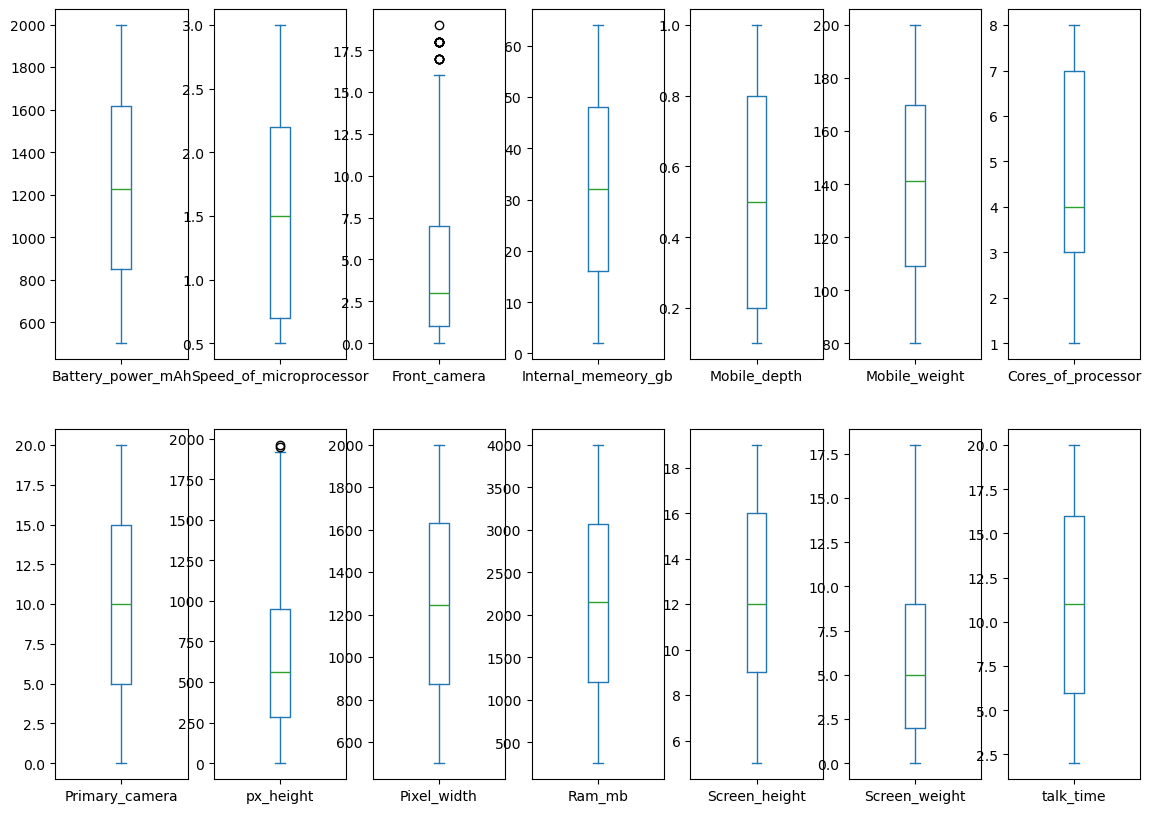

In [37]:
df.plot.box(subplots=True, layout=(2, 7), figsize=(14, 10))

<Axes: >

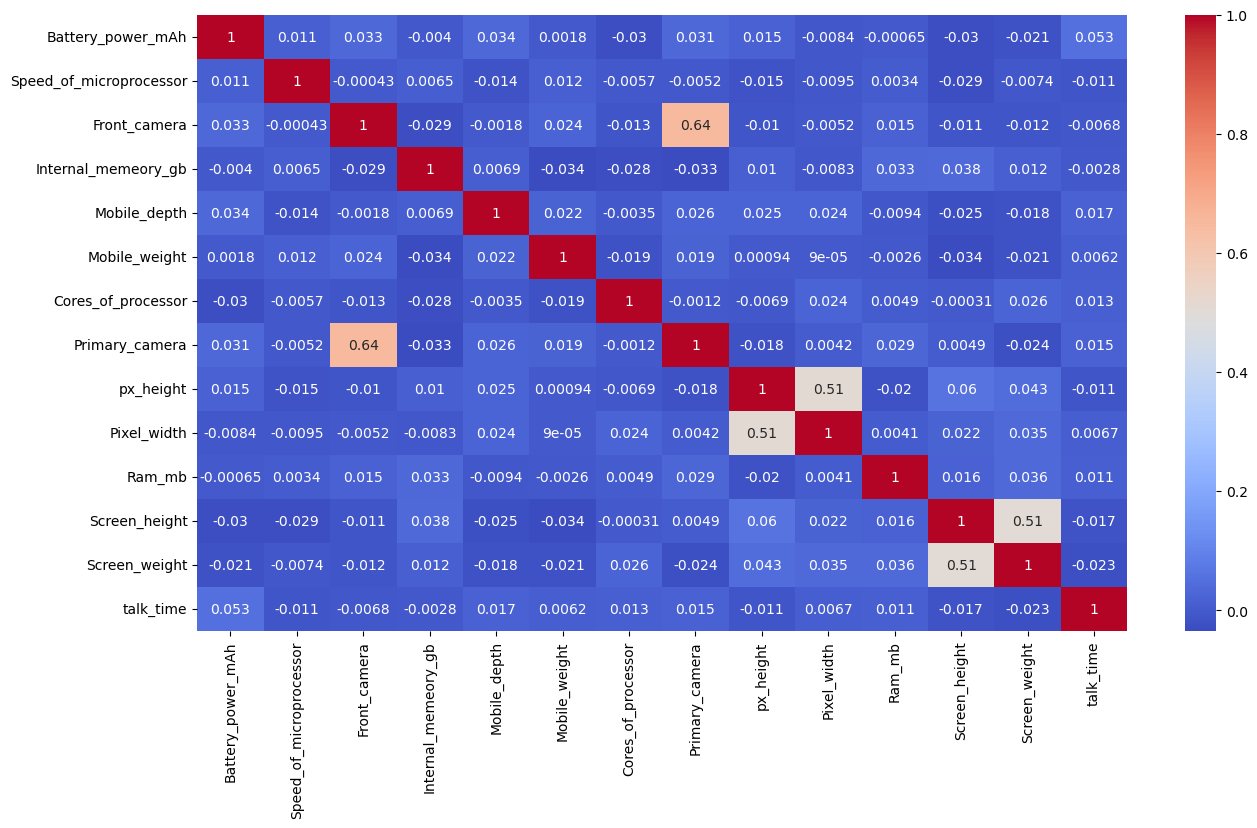

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [39]:
from sklearn.preprocessing import LabelEncoder
cp = df.copy()
categorial_features = cp.select_dtypes(include='object').columns.difference(['price_range', 'target']).tolist()
# just a plug for visualization 
cp[categorial_features] = cp[categorial_features].apply(lambda x: LabelEncoder().fit_transform(x), axis=0)

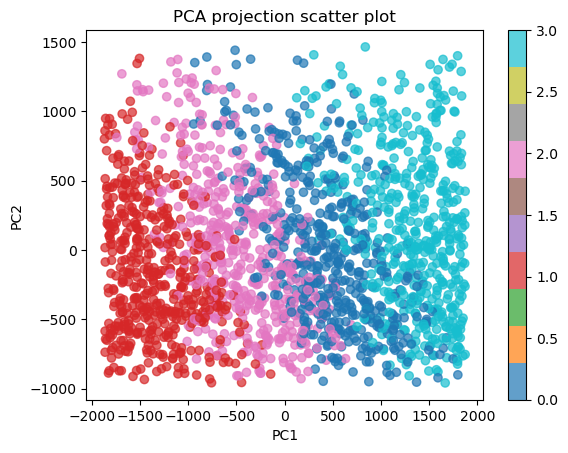

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(cp[numeric_cols])
plt.scatter(
    proj[:,0], proj[:,1],
    c=LabelEncoder().fit_transform(df['price_range']),
    cmap='tab10', alpha=0.7
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection scatter plot')
plt.colorbar()
plt.show()

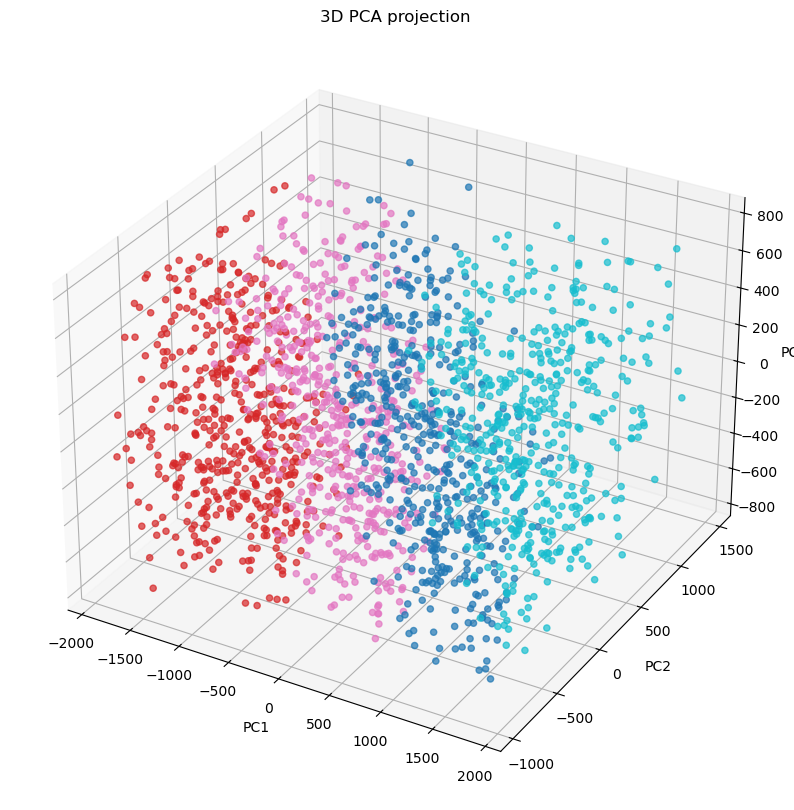

In [41]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(cp[numeric_cols])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    proj[:,0], proj[:,1], proj[:,2],
    c=LabelEncoder().fit_transform(df['price_range']),
    cmap='tab10', alpha=0.7
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA projection')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(['price_range'], axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2, stratify=y_train)

In [43]:
from catboost import CatBoostClassifier, Pool
catboost = CatBoostClassifier(
    iterations=2000,
    early_stopping_rounds=1000,
    learning_rate=0.001,
    task_type='GPU',
    verbose=100,
    random_state=42,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    auto_class_weights='Balanced',
)

In [44]:
train_pool = Pool(X_train, y_train, cat_features=categorial_features)
val_pool = Pool(X_val, y_val, cat_features=categorial_features)

In [45]:
catboost.fit(train_pool, eval_set=val_pool)

0:	learn: 0.8186279	test: 0.8575186	best: 0.8575186 (0)	total: 9.89ms	remaining: 19.8s
100:	learn: 0.8642405	test: 0.8408776	best: 0.8643582 (5)	total: 536ms	remaining: 10.1s
200:	learn: 0.8757447	test: 0.8514870	best: 0.8643582 (5)	total: 1s	remaining: 9s
300:	learn: 0.8749393	test: 0.8549107	best: 0.8643582 (5)	total: 1.49s	remaining: 8.42s
400:	learn: 0.8766879	test: 0.8511552	best: 0.8643582 (5)	total: 1.98s	remaining: 7.91s
500:	learn: 0.8803612	test: 0.8583023	best: 0.8643582 (5)	total: 2.48s	remaining: 7.43s
600:	learn: 0.8873769	test: 0.8725221	best: 0.8725221 (580)	total: 2.96s	remaining: 6.9s
700:	learn: 0.8909498	test: 0.8793988	best: 0.8793988 (612)	total: 3.46s	remaining: 6.41s
800:	learn: 0.8935217	test: 0.8863872	best: 0.8863872 (739)	total: 3.96s	remaining: 5.92s
900:	learn: 0.8970629	test: 0.8899773	best: 0.8899773 (899)	total: 4.46s	remaining: 5.44s
1000:	learn: 0.9006508	test: 0.8864026	best: 0.8899773 (899)	total: 4.95s	remaining: 4.94s
1100:	learn: 0.9041638	test: 

In [46]:
from sklearn.metrics import classification_report

print(classification_report(catboost.predict(X_test), y_test))

                precision    recall  f1-score   support

     High cost       0.79      0.83      0.81       143
      Low cost       0.91      0.88      0.90       155
   Medium cost       0.81      0.81      0.81       150
Very High cost       0.91      0.90      0.91       152

      accuracy                           0.86       600
     macro avg       0.86      0.86      0.86       600
  weighted avg       0.86      0.86      0.86       600



In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import LogisticRegression


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', TargetEncoder(), categorial_features)

    ],
    remainder='drop'
)

lg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=5000, random_state=42))
])

In [48]:
lg_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
y_pred = lg_pipeline.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

                precision    recall  f1-score   support

     High cost       0.95      0.96      0.95       148
      Low cost       0.93      0.92      0.92       151
   Medium cost       0.91      0.89      0.90       153
Very High cost       0.97      0.99      0.98       148

      accuracy                           0.94       600
     macro avg       0.94      0.94      0.94       600
  weighted avg       0.94      0.94      0.94       600



In [51]:
lg_prepocessor = lg_pipeline.named_steps['preprocess']
label_encoder = LabelEncoder().fit(y)

In [52]:
import torch
from torch.utils.data import DataLoader, TensorDataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)


y_train_t = torch.tensor(label_encoder.transform(y_train), dtype=torch.int64, device=device)
X_train_t = torch.tensor(lg_prepocessor.transform(X_train), dtype=torch.float32, device=device)

y_test_t  = torch.tensor(label_encoder.transform(y_test), dtype=torch.int64, device=device)
X_test_t  = torch.tensor(lg_prepocessor.transform(X_test), dtype=torch.float32, device=device)

y_val_t  = torch.tensor(label_encoder.transform(y_val), dtype=torch.int64, device=device)
X_val_t  = torch.tensor(lg_prepocessor.transform(X_val), dtype=torch.float32, device=device)


train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


cpu


In [53]:
from torch import nn
import torch
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
    nn.Linear(38, 256),
    nn.BatchNorm1d(256),  # для стабилизации и ускорения обучения
    nn.ReLU(),
    nn.Dropout(0.4),

    nn.Linear(256, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(64, 4)   # без Softmax, т.к. CrossEntropyLoss включает его
)
model.to(device=device)
criterion = nn.CrossEntropyLoss()  # для многоклассовой классификации
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [54]:
epochs = 100
verbose = 25

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()     
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if (epoch + 1) % verbose == 0:
        avg_loss = epoch_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

        # Валидация
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            output_val = model(X_val_t)
            val_loss = criterion(output_val, y_val_t).item()

            _, predicted = torch.max(output_val, 1)
            correct = (predicted == y_val_t).sum().item()
            total = y_val_t.size(0)

        val_accuracy = correct / total
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 25/100, Loss: 0.2890
Validation Loss: 0.2052, Validation Accuracy: 0.9214
Epoch 50/100, Loss: 0.2230
Validation Loss: 0.1632, Validation Accuracy: 0.9464
Epoch 75/100, Loss: 0.1878
Validation Loss: 0.1531, Validation Accuracy: 0.9393
Epoch 100/100, Loss: 0.1881
Validation Loss: 0.1533, Validation Accuracy: 0.9500


In [55]:
from sklearn.metrics import accuracy_score
model.eval()
with torch.no_grad():
    test_output = model(X_test_t)
    _, predicted = torch.max(test_output, 1)

    y_pred = y_test_t.cpu().numpy()
    predicted = predicted.cpu().numpy()

    accuracy = accuracy_score(predicted, y_pred)
    print(f'Точность на тестовой выборке: {accuracy:.4f}')
    print(
        classification_report(
            label_encoder.inverse_transform(y_pred),
            label_encoder.inverse_transform(predicted)
            )
        )


Точность на тестовой выборке: 0.9000
                precision    recall  f1-score   support

     High cost       0.92      0.85      0.89       150
      Low cost       0.90      0.92      0.91       150
   Medium cost       0.82      0.85      0.83       150
Very High cost       0.96      0.98      0.97       150

      accuracy                           0.90       600
     macro avg       0.90      0.90      0.90       600
  weighted avg       0.90      0.90      0.90       600



# Лучший подход - логистическая регрессия

In [61]:
import warnings
import optuna
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")


def objective(trial):
    # Ставим параметры логистической регрессии для оптимизации
    C = trial.suggest_float('clf__C', 1e-4, 1e2, log=True)
    penalty = trial.suggest_categorical('clf__penalty', ['l1', 'l2'])
    
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    
    lg_pipeline.set_params(clf__C=C, clf__penalty=penalty, clf__solver=solver, clf__random_state=42)
    
    scores = cross_val_score(lg_pipeline, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
    
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Лучшие параметры:', study.best_params)
print('Лучшая точность:', study.best_value)

[I 2025-09-03 01:05:26,844] A new study created in memory with name: no-name-cbcd2db8-7e89-4e82-8d50-b46cd00359e7
[I 2025-09-03 01:05:26,962] Trial 0 finished with value: 0.6528705139810367 and parameters: {'clf__C': 0.0026537056742312122, 'clf__penalty': 'l2'}. Best is trial 0 with value: 0.6528705139810367.
[I 2025-09-03 01:05:27,117] Trial 1 finished with value: 0.9561160162276308 and parameters: {'clf__C': 4.360703492817637, 'clf__penalty': 'l2'}. Best is trial 1 with value: 0.9561160162276308.
[I 2025-09-03 01:05:27,229] Trial 2 finished with value: 0.6083118874525761 and parameters: {'clf__C': 0.0009022652743445935, 'clf__penalty': 'l2'}. Best is trial 1 with value: 0.9561160162276308.
[I 2025-09-03 01:05:27,388] Trial 3 finished with value: 0.9605591660605048 and parameters: {'clf__C': 8.914769099715418, 'clf__penalty': 'l2'}. Best is trial 3 with value: 0.9605591660605048.
[I 2025-09-03 01:05:27,504] Trial 4 finished with value: 0.7724689826886202 and parameters: {'clf__C': 0.0

Лучшие параметры: {'clf__C': 58.307070099068696, 'clf__penalty': 'l2'}
Лучшая точность: 0.966822863919065


In [62]:
lg_pipeline.set_params(**study.best_params)
lg_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
print(
    classification_report(
        lg_pipeline.predict(X_test),
        y_test
    )
)

                precision    recall  f1-score   support

     High cost       0.96      0.94      0.95       153
      Low cost       0.97      0.94      0.95       154
   Medium cost       0.90      0.94      0.92       143
Very High cost       0.98      0.98      0.98       150

      accuracy                           0.95       600
     macro avg       0.95      0.95      0.95       600
  weighted avg       0.95      0.95      0.95       600



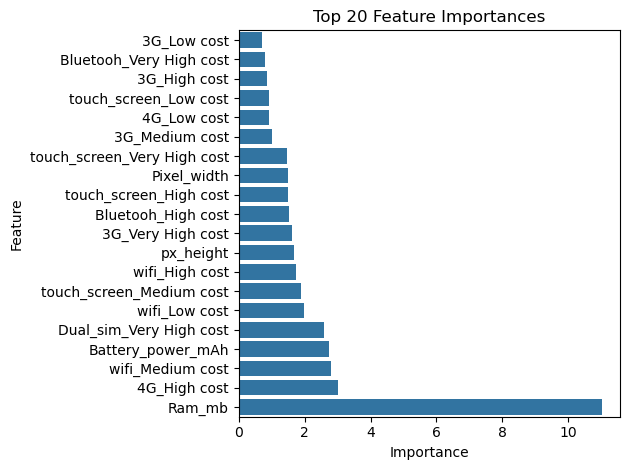

In [78]:
import seaborn as sns


def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
        else:
            names = columns
        feature_names.extend(names)
    return feature_names


preprocessor = lg_pipeline.named_steps['preprocess']
feature_names = get_feature_names(preprocessor)

model = lg_pipeline.named_steps['clf']
coefs = model.coef_[0]


coef_df = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(coefs),
    'coef': coefs
}).sort_values(by='importance')

sns.barplot(coef_df.iloc[-20:], y='feature', x='importance', orient='h')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

In [65]:
import joblib

joblib.dump(lg_pipeline, 'lg_model_pipeline.joblib')

['lg_model_pipeline.joblib']